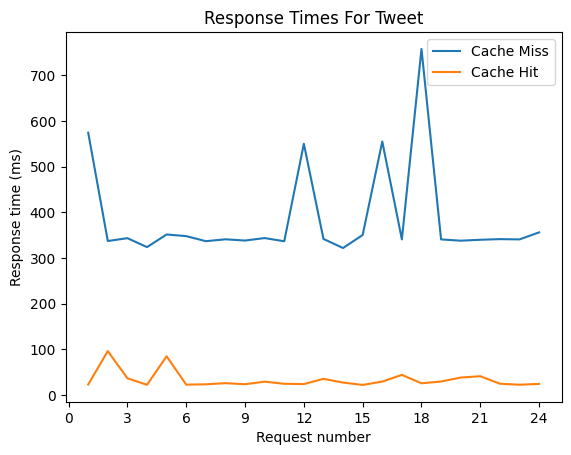

In [28]:
import requests
import matplotlib.pyplot as plt
import time
from matplotlib.ticker import MaxNLocator

# List to store the response times
response_times_miss = []
response_times_hit = []

url = 'http://app-egs-mixit.deti:80/v1/users/'
# List of URLs for your API endpoints
params = [
    '1665151711927844864',
    '1665183728757252096',
    '1665219395251994624',
    '1665063003916578816',
    '1665333921473503234',
    '1665307743312289793',
    '1665107285570379780',
    '1665040492017647617',
    '1665104885094727681',
    '1664726727019380737',
    '1665131318861078528',
    '1665073122511409154',
    '1665338565344067584',
    '1665172372276535296',
    '1665055975903035393',
    '1665024176048988160',
    '1665075320901230592',
    '1665010599284047873',
    '1664997453634887687',
    '1665139359400488962',
    '1665057966574239744',
    '1665000496250101760',
    '1665168956070526982',
    '1665065386658738178'
]

for i in range(0, 6):    
    for index, param in enumerate(params):
        start_time = time.time()
        response = requests.get(url + param)
        end_time = time.time()

        # Calculate the response time and add it to the list
        response_time = end_time - start_time
        if i == 0 or i == 1:
            if i == 0:
                response_times_miss.append(response_time*1000)
            else:
                response_times_hit.append(response_time*1000)
        else:
            response_times_hit[index] += response_time*1000

        # Optional: add a delay between requests
        time.sleep(3)

    if i == 5:
        # Average the response times
        response_times_hit = [x / 5 for x in response_times_hit]

# Plot the response times as a line graph
plt.plot(range(1, len(params) + 1), response_times_miss, label='Cache Miss')
plt.plot(range(1, len(params) + 1), response_times_hit, label='Cache Hit')

# Set x-axis to display only whole numbers
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('Request number')
plt.ylabel('Response time (ms)')
plt.title('Response Times For Tweet')
plt.legend()

plt.savefig('tweet_response_times.png')
plt.show()


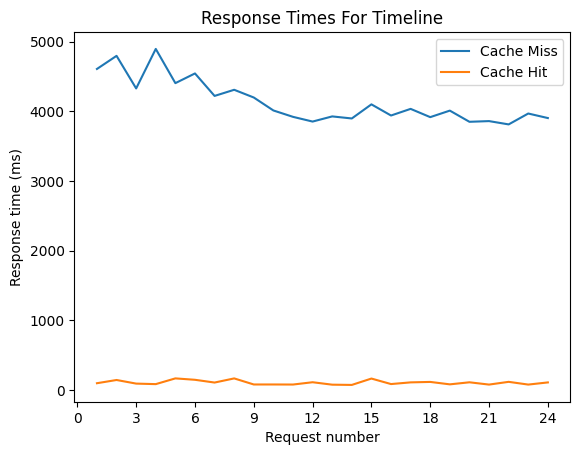

In [37]:
import requests
import matplotlib.pyplot as plt
import time
from matplotlib.ticker import MaxNLocator

# List to store the response times
response_times_miss = []
response_times_hit = []

url = 'http://app-egs-mixit.deti:80/v1/users/'
# List of URLs for your API endpoints
params = [
        '93021028',
        '593326286',
        '1482424736172974085',
        '1140005401234219009',
        '1376652820850610188',
        '1548030271919779843',
        '1504086687298822149',
        '1158007712980119557',
        '1370394029310017537',
        '1128683867819380737',
        '902948945852235776',
        '758772626206691328',
        '2949010041',
        '2197487762',
        '891843119238565888',
        '805167486127767553',
        '202230373',
        '360831528',
        '1446234539160915971',
        '216759148',
        '22531295',
        '12429652',
        '51032310',
        '129445020'
]

for i, param in enumerate(params):
    requests.post(url + str(i) + '?name=a&username=' + str(i) + '&location=a&twitter_id=' + str(param))

url = 'http://app-egs-mixit.deti:80/v1/posts/'
for i in range(0, 6):    
    for index, param in enumerate(params):
        start_time = time.time()
        response = requests.get(url + str(index) + '/timeline')
        end_time = time.time()

        # Calculate the response time and add it to the list
        response_time = end_time - start_time
        if i == 0 or i == 1:
            if i == 0:
                response_times_miss.append(response_time*1000)
            else:
                response_times_hit.append(response_time*1000)
        else:
            response_times_hit[index] += response_time*1000

        # Optional: add a delay between requests
        time.sleep(3)

    if i == 5:
        # Average the response times
        response_times_hit = [x / 5 for x in response_times_hit]

# Plot the response times as a line graph
plt.plot(range(1, len(params) + 1), response_times_miss, label='Cache Miss')
plt.plot(range(1, len(params) + 1), response_times_hit, label='Cache Hit')

# Set x-axis to display only whole numbers
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.xlabel('Request number')
plt.ylabel('Response time (ms)')
plt.title('Response Times For Timeline')
plt.legend()

plt.savefig('timeline_response_times.png')
plt.show()
